# Topic: Adaptive Thresholding - Edge Detection in Images.


Question:
    Using OpenCV, first convert any image with varying high condition to a "Grayscale" image. Now, implement Edge detection first using the "Canny Edge" detection. Then apply simple thresholding and also "Adaptive/OTSU thresholding" using openCV, to see the working of each of these methods. Once you obtain good results, use the obtained edge detection result as a mask to give color to all the edges.


This serves as one Solution to the above Question.
Solved by Ms. Tejaswini Jayashanker.


In [1]:
#import the necessary libraries:
import cv2
import numpy as np
from PIL import Image #importing class "Image" from PIL module
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image as image_k

In [2]:
#Load the Image of Interest:
org_img = cv2.imread( "Kpop_Group.jpg" )
cv2.imshow( "Original_Image",org_img )
cv2.waitKey( 0 )

-1

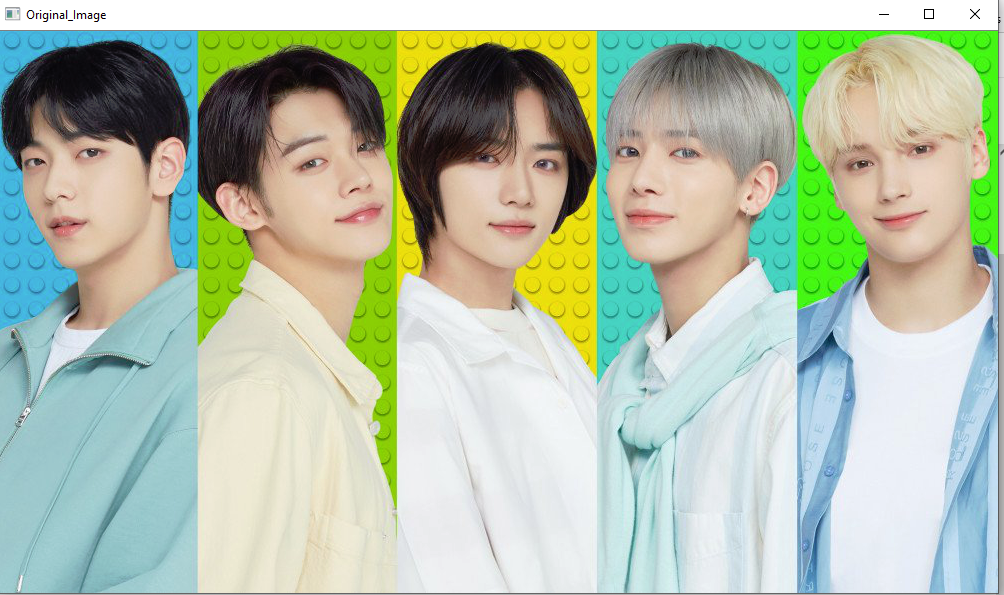

Pre-processing Steps:

In [3]:
#Convert the Color Image to Grayscale.
preproc_img = cv2.cvtColor( org_img, cv2.COLOR_BGR2GRAY )
#For reference, show the Grayscale image:
cv2.imshow( "Grayscale_Image", preproc_img )
cv2.waitKey( 0 )

-1

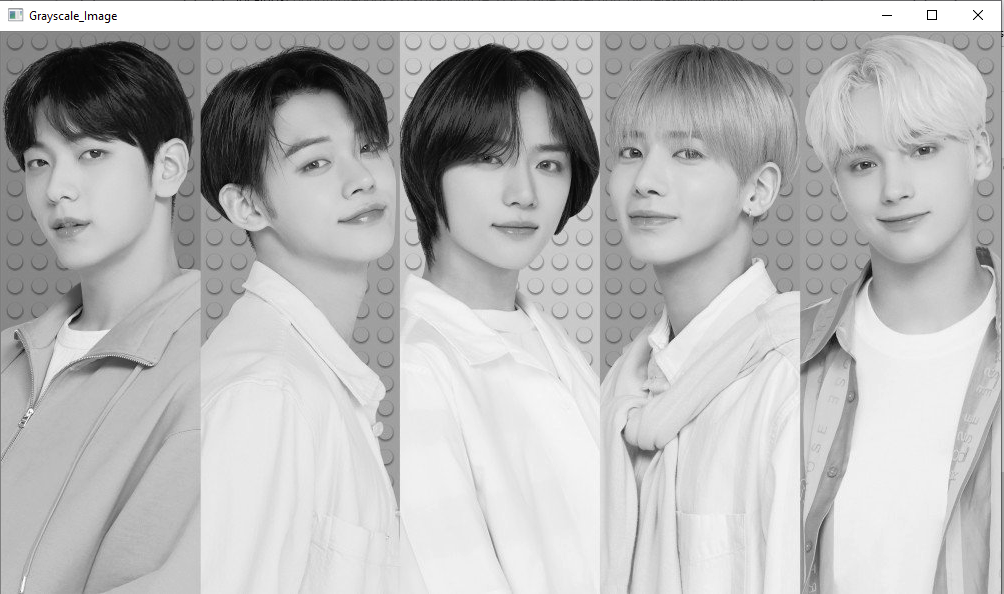

Implementation of Canny Edge Detection.

Step - 1: Noise Reduction (using Gaussian Filter).

Step - 2: Gradient Calculation along the Horizontal axis and Vertical Axis.

Step - 3: Non-Maximum suppresion of false edges.

Step - 4: Double thresholding for segregating strong and weak edges.

Step - 5: Edge tracking by hysteresis.

In [4]:
def cannyEdgeDetector( image, min_threshold = None, max_threshold = None ):
    
    #Step - 1 Image Smoothing: Reduce the Noise present in the image by using Gaussian Blur-
    image = cv2.GaussianBlur( image, ( 5, 5 ), 1.4 )
    
    #Step -2 Calculate the Gradients-
    grad_x = cv2.Sobel( np.float32( image ), cv2.CV_64F, 1, 0 ,3 )
    grad_y = cv2.Sobel( np.float32( image ), cv2.CV_64F, 0, 1, 3 )
    
    # Convert cartesian coordinates to polar coordinates- 
    magnitude, angle = cv2.cartToPolar( grad_x, grad_y, angleInDegrees = True )
    
    #Set the minimum and maximum thresholds for doubling threshold val-
    magn_max = np.max( magnitude )
    
    if not min_threshold : min_threshold = ( magn_max * 0.1 )
    if not max_threshold : max_threshold = ( magn_max * 0.5 )
    
    #Dimensions of the Input
    hgt, wdth = preproc_img.shape
    
    #Iterate through every pixel of the grayscale image-
    for ix in range( wdth ):
        for iy in range( hgt ):
            
            grad_angle = angle[ iy, ix ]
            grad_angle = abs( grad_angle - 180 ) if ( abs( grad_angle ) > 180 ) else abs( grad_angle )
            
            # select neighborhood of target pixel as per grad in X- direction -
            if grad_angle <= 22.5:
                neighbor_1x, neighbor_1y = ix - 1, iy
                neighbor_2x, neighbor_2y = ix + 1, iy
            
            # select neighborhood of target pixel as per grad in top Right direction -
            elif grad_angle > 22.5 and grad_angle <= ( 22.5 + 45 ):
                neighbor_1x, neighbor_1y = ix - 1, iy - 1
                neighbor_2x, neighbor_2y = ix + 1, iy + 1
            
            # select neighborhood of target pixel as per grad in Y- direction -
            elif grad_angle > ( 22.5 + 45 ) and grad_angle <= ( 22.5 + 90 ):
                neighbor_1x, neighbor_1y = ix, iy - 1
                neighbor_2x, neighbor_2y = ix, iy + 1
                
            # select neighborhood of target pixel as per grad in top Right direction -
            elif grad_angle > ( 22.5 + 90 ) and grad_angle <= ( 22.5 + 135 ):
                neighbor_1x, neighbor_1y = ix - 1, iy + 1
                neighbor_2x, neighbor_2y = ix + 1, iy - 1
                
            #Restart the Cycle-
            elif grad_angle > ( 22.5 + 135 ) and grad_angle <= ( 22.5 + 180 ):
                neighbor_1x, neighbor_1y = ix - 1, iy
                neighbor_2x, neighbor_2y = ix + 1, iy
            
            #Step-3 Non-maximum Suppresion Stop for false edges-
            if wdth > neighbor_1x >= 0 and hgt > neighbor_1y >= 0:
                if magnitude[ iy, ix ] < magnitude[neighbor_1y, neighbor_1x ]:
                    magnitude[ iy, ix ] = 0
                    continue
            
            if wdth > neighbor_2x >= 0 and hgt > neighbor_2y >= 0:
                if magnitude[ iy, ix ] < magnitude[neighbor_2y, neighbor_2x ]:
                    magnitude[ iy, ix ] = 0
            
    weak_ids = np.zeros_like( image )
    strong_ids = np.zeros_like( image )
    ids = np.zeros_like( image )
    
    #Step - 4 Double thresholding for segregating strong and weak edges-
    for ix in range( wdth ):
        for iy in range( hgt ):
            grad_magn = magnitude[ iy, ix ]
            
            if grad_magn < min_threshold:
                magnitude[ iy, ix ] = 0
            elif max_threshold > grad_magn >= min_threshold:
                ids[ iy, ix ] = 1
            else:
                ids[ iy, ix ] = 2
            
    #return the Edges- 
    return magnitude

<Figure size 432x288 with 0 Axes>

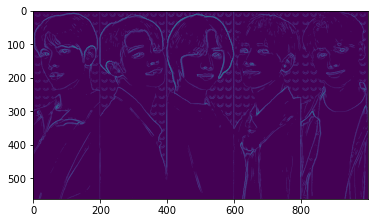

In [5]:
canny_image = cannyEdgeDetector( preproc_img )

plt.figure()
fig, plots = plt.subplots( 1, 1 )
plots.imshow( canny_image )

In [6]:
cv2.imshow( "Canny_Edge_Detected_Image", canny_image )
cv2.waitKey( 0 )

-1

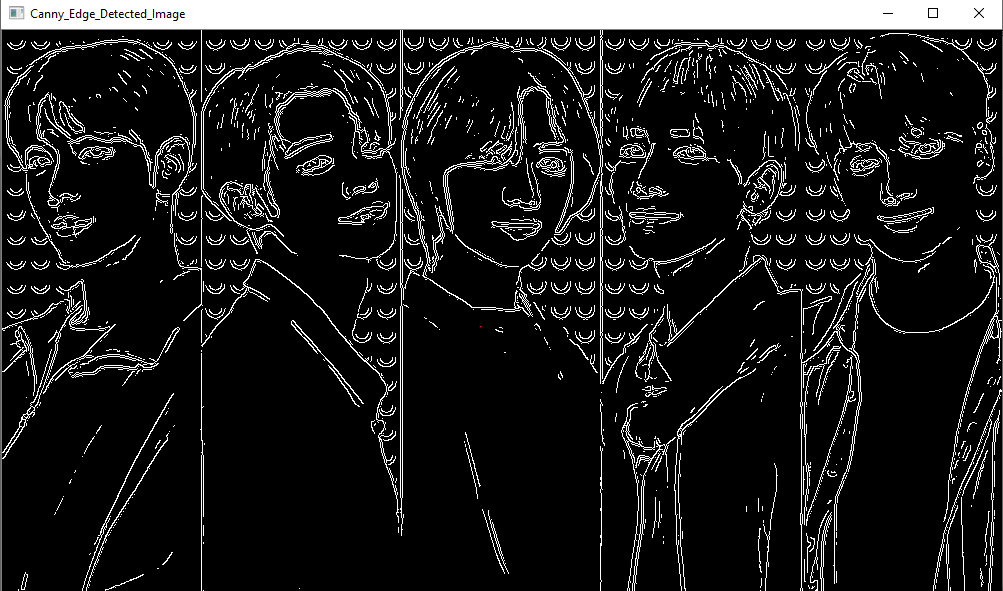

In [21]:
#try Canny Edge Detection:
can_img = cv2.Canny( org_img, 100, 200 )
cv2.imshow("CANNY IMG ", can_img )
cv2.waitKey( 0 )

-1

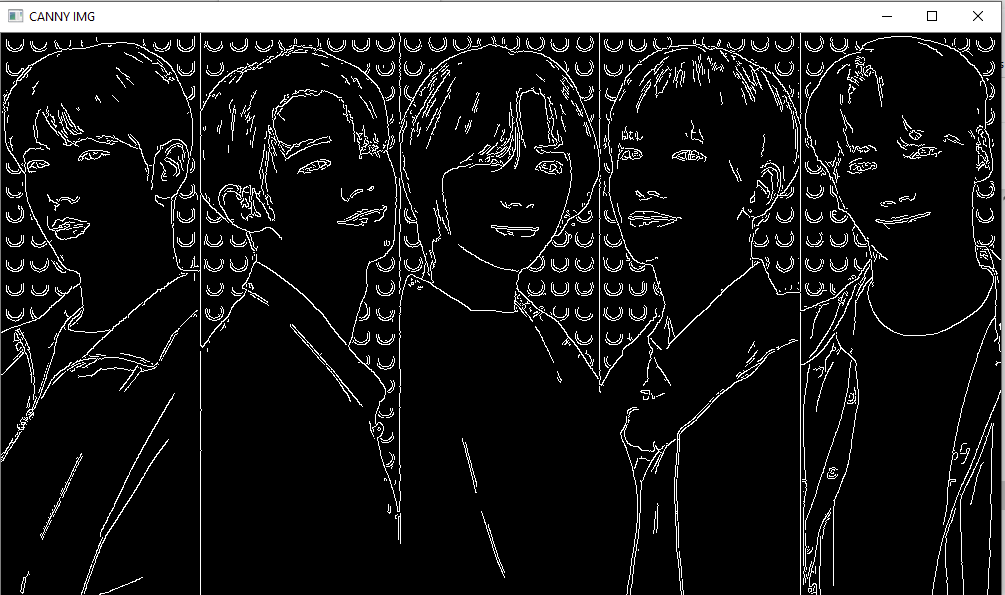

In [22]:
can_img = cv2.cvtColor( can_img, cv2.COLOR_GRAY2BGR )
print("Converted OSTU_BIN Image Size ", can_img.shape)
result0_img = cv2.bitwise_and( org_img, can_img )
cv2.imshow("Overlap Canny image ", result0_img )
cv2.waitKey( 0 )

Converted OSTU_BIN Image Size  (562, 1000, 3)


-1

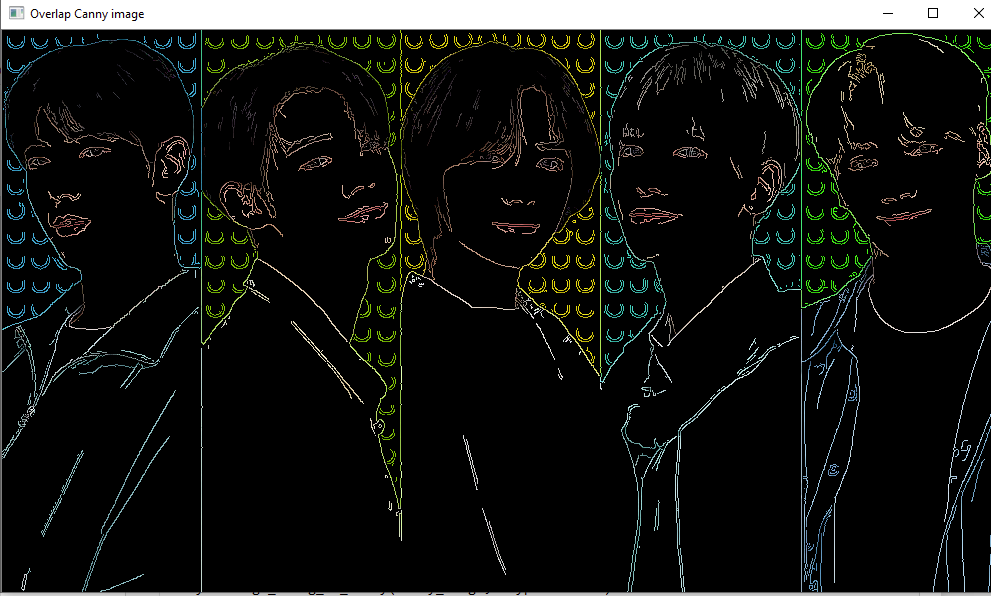

Part - B:  Binary Thresholding and OTSU Thresholding. 

In [17]:
#Do Binary(Simple) and OTSU Thresholding:
canny = image_k.img_to_array(canny_image, dtype='uint8')
ret, thresh_img = cv2.threshold( canny, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU )
#Display output of simple Thresholding
print( "After Thresholding: " )
cv2.imshow("Thrsholding_Img", thresh_img )
cv2.waitKey( 0 )

After Thresholding: 


-1

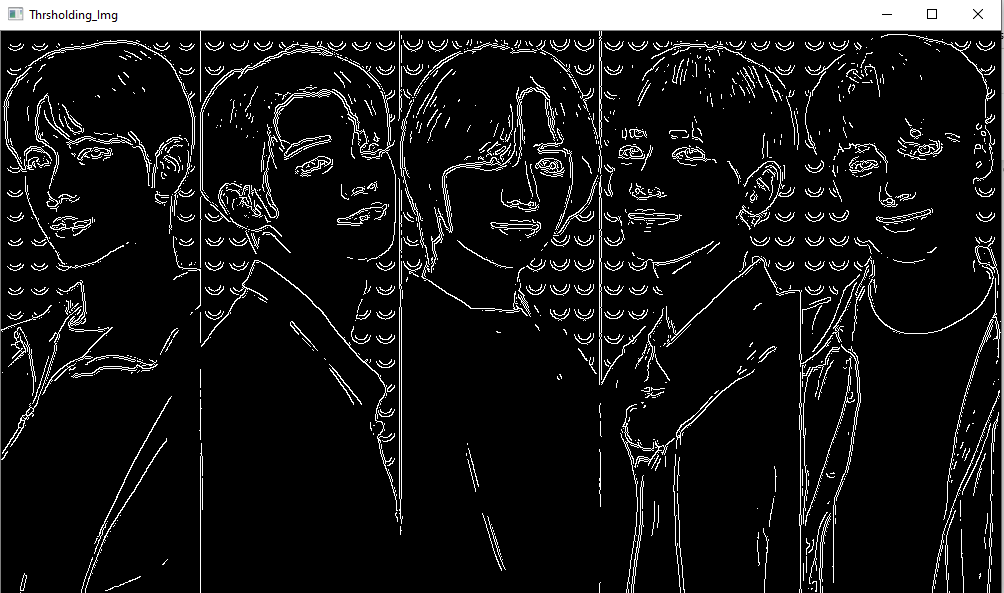

In [19]:
#COLORING EDGES - Output using OTSU/Binary Thresholding.
print("Original OSTU_BIN Image Size ", thresh_img.shape)
thresh_img = cv2.cvtColor( thresh_img, cv2.COLOR_GRAY2BGR )
print("Converted OSTU_BIN Image Size ", thresh_img.shape)
result1_img = cv2.bitwise_and( org_img, thresh_img )
cv2.imshow("Overlap", result1_img )
cv2.waitKey( 0 )

Original OSTU_BIN Image Size  (562, 1000, 3)
Converted OSTU_BIN Image Size  (562, 1000, 3)


-1

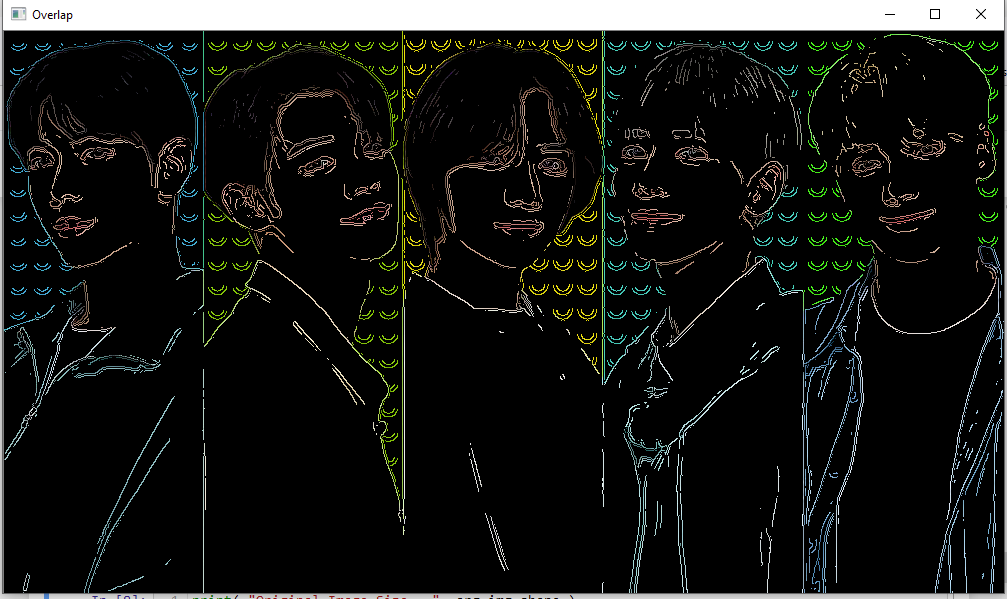

In [8]:
print( "Original Image Size = ", org_img.shape )
print( "Canny Image Size = ", canny.shape )

Original Image Size =  (562, 1000, 3)
Canny Image Size =  (562, 1000, 1)


In [9]:
canny = cv2.cvtColor( canny, cv2.COLOR_GRAY2BGR ) # Converting to 3 channels Monochrome Image.
canny.shape

(562, 1000, 3)

In [11]:
#COLORING EDGES - Ouput using Canny Edge Detection.
result_img = cv2.bitwise_and( org_img, canny )
cv2.imshow("Overlap", result_img )
cv2.waitKey( 0 )

-1

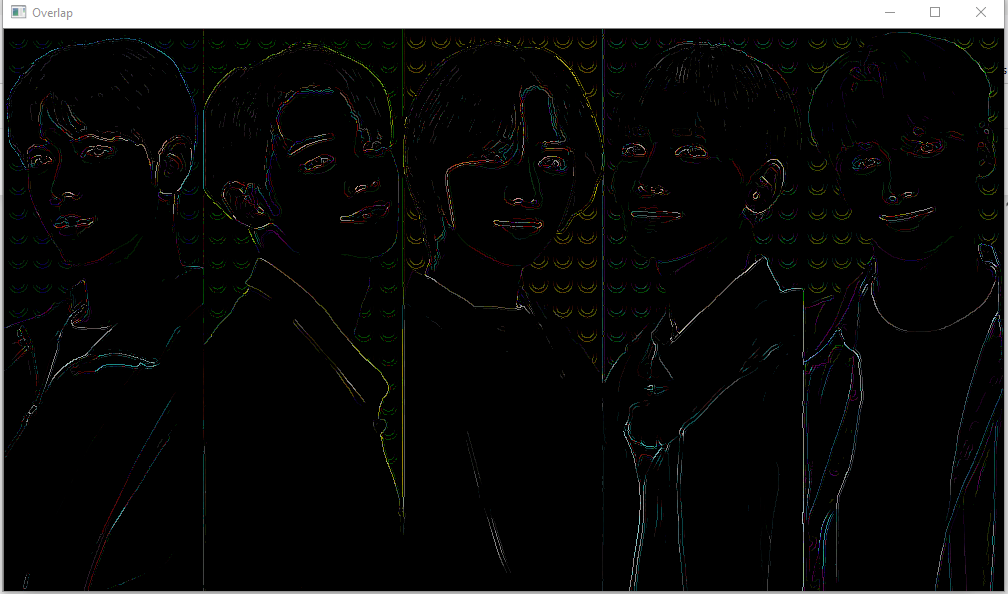

In [13]:
#OVERLAPPING Grayscale with Colored Image.
overlay_img = cv2.addWeighted( org_img, 0.5, canny, 0.5, 0 )
cv2.imshow("OverlaY", overlay_img )
cv2.waitKey( 0 )

-1

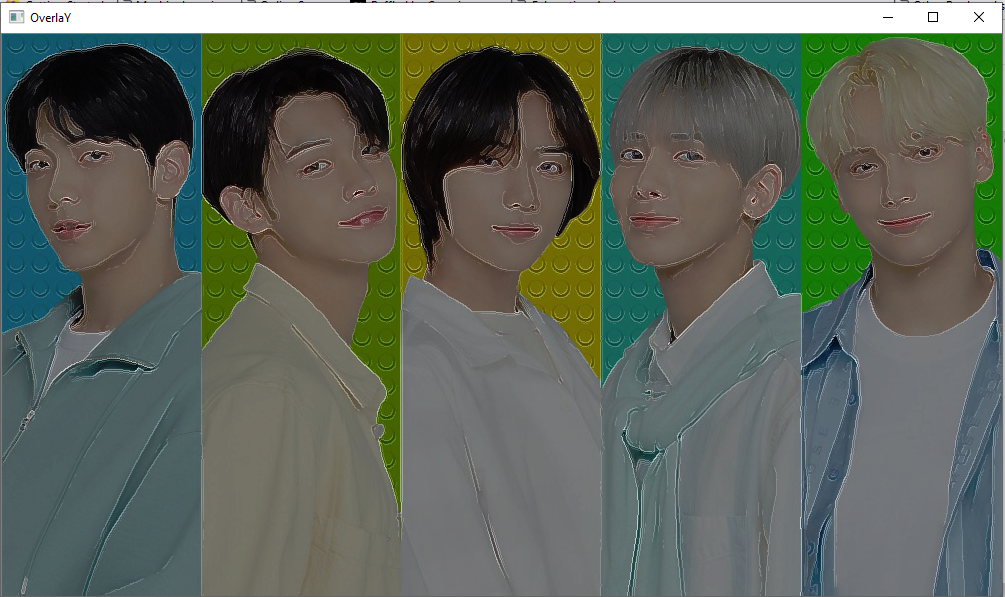